Missing values in dataset:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


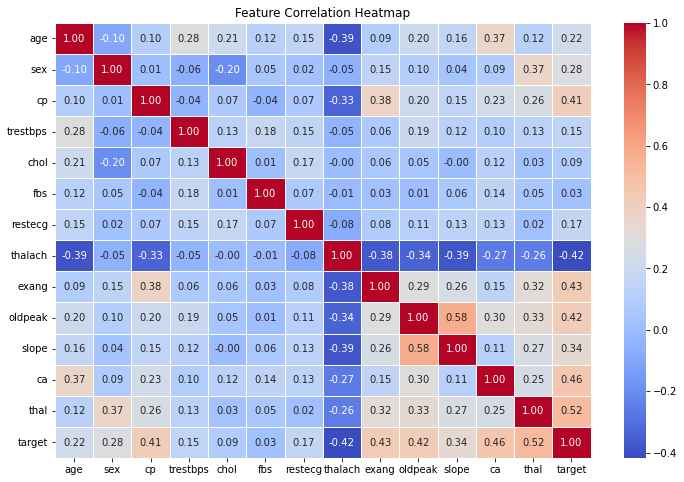


Top correlated features with Target (Heart Disease):
 target      1.000000
thal        0.515894
ca          0.460033
exang       0.431894
oldpeak     0.424510
thalach     0.417167
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
Name: target, dtype: float64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Assuming the file is 'heart_disease.csv')
df = pd.read_csv("Heart_disease_cleveland_new.csv")

# Check for missing values
print("Missing values in dataset:\n", df.isnull().sum())

# Compute correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify highly correlated features with the target variable
target_corr = corr_matrix["target"].abs().sort_values(ascending=False)
print("\nTop correlated features with Target (Heart Disease):\n", target_corr)

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load dataset
df = pd.read_csv("Heart_disease_cleveland_new.csv")

# Drop ID if present
if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# Separate target variable
X = df.drop(columns=["target"])  # Features
y = df["target"]  # Target

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate performance
train_preds = model.predict(X_train)
valid_preds = model.predict(X_valid)

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Validation Accuracy:", accuracy_score(y_valid, valid_preds))

# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop features predicting Heart Disease:\n", feature_importance.head(10))


Train Accuracy: 1.0
Validation Accuracy: 0.8461538461538461

Top features predicting Heart Disease:
 thalach     0.127195
cp          0.126830
ca          0.124486
thal        0.094675
oldpeak     0.090503
age         0.088124
trestbps    0.079584
chol        0.077329
exang       0.072145
sex         0.048392
dtype: float64
